## Día 4
Referencias :
[Qiskit textbook](https://qiskit.org/textbook/ch-algorithms/teleportation.html)

In [5]:
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, Aer, execute
from qiskit.ignis.verification import marginal_counts # Solamente miremos la medición de Bob
from qiskit.visualization import plot_histogram

### Circuito de teletransportación

<img src="tele.png" width=450pt/>

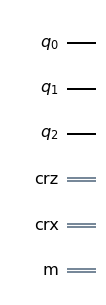

In [3]:
qr = QuantumRegister(3,name="q") # Qubits del protocolo. qr[0] es el que se busca teletransportar
crz = ClassicalRegister(1,name="crz") # Registro Clásico para aplicar Z al final
crx = ClassicalRegister(1,name="crx") # Registro Clásico para aplicar X al final
crm = ClassicalRegister(1,name="m") # Medición final

circuito_tele = QuantumCircuit(qr,crz,crx,crm)
circuito_tele.draw('mpl')

#### Estado de Bell compartido
<img src="bell_St.png" width=450pt/>

In [5]:
def crear_estado_bell(qc,q1,q2): # (circuito, qubit1, qubit2)
    qc.h(q1)
    qc.cx(q1,q2)

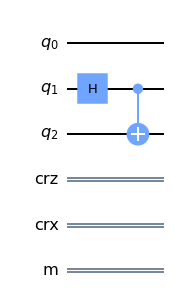

In [6]:
crear_estado_bell(circuito_tele,1,2)
circuito_tele.draw('mpl')

#### Medición de Bell por parte de Alice

<img src="bell_m.png" width=450pt/>

In [7]:
def medicion_bell_alice(qc,q1,q2):
    qc.cx(q1,q2)
    qc.h(q1)

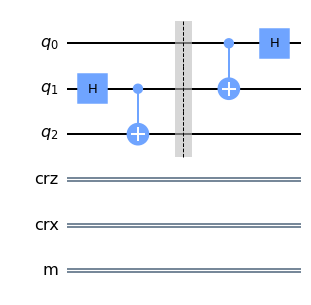

In [8]:
circuito_tele.barrier()
medicion_bell_alice(circuito_tele,0,1)
circuito_tele.draw('mpl')

#### Deferred measurement para los if

Se hace así sólo para mostrar el principio. Pero en general no se puede, ya que Alice y Bob están lejos

[Principio](https://es.wikipedia.org/wiki/Principio_de_la_medida_diferida)

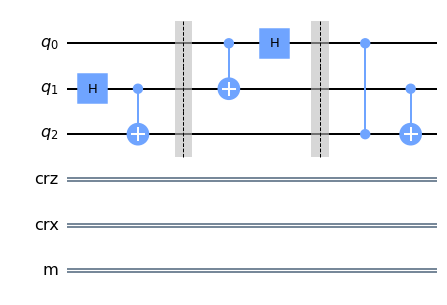

In [9]:
circuito_tele.barrier()
circuito_tele.cz(0,2)
circuito_tele.cx(1,2)
circuito_tele.draw('mpl')

#### Mediciones

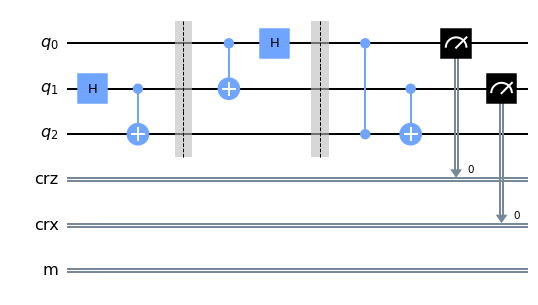

In [10]:
circuito_tele.measure(0,crz)
circuito_tele.measure(1,crx)
circuito_tele.draw('mpl')

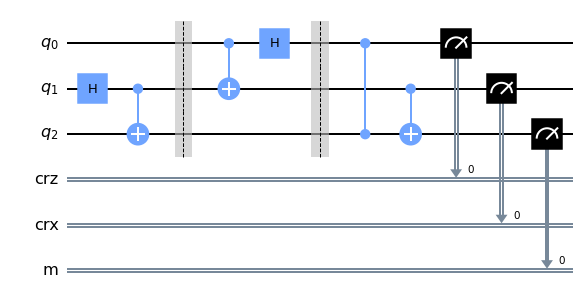

In [11]:
circuito_tele.measure(2,crm)
circuito_tele.draw('mpl')

#### Simulación

In [9]:
sim = Aer.get_backend("aer_simulator")

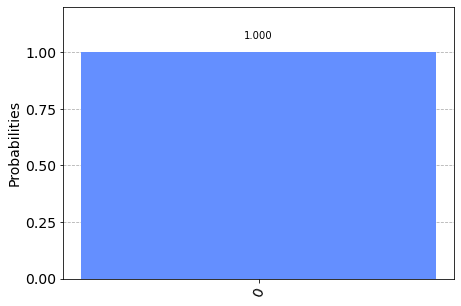

In [13]:
res = execute(circuito_tele,backend=sim,shots=1024).result()

from qiskit.ignis.verification import marginal_counts # Solamente miremos la medición de Bob
from qiskit.visualization import plot_histogram

counts = marginal_counts(res.get_counts(),[2])
plot_histogram(counts)

### Generalizar y juntar

In [6]:
def Iniciar(qc,estado):
    qc.initialize(estado,0)
    
def crear_estado_bell(qc,a,b):
    qc.h(a)
    qc.cx(a,b)

def medicion_bell_alice(qc,a,b):
    qc.cx(a,b)
    qc.h(a)
    
def circuito_telep(estado_inicial):
    qr = QuantumRegister(3,name="q") 
    crz = ClassicalRegister(1,name="crz")
    crx = ClassicalRegister(1,name="crx") 
    crm = ClassicalRegister(1,name="m") 

    circuito_tele = QuantumCircuit(qr,crz,crx,crm)
    Iniciar(circuito_tele,estado_inicial)
    crear_estado_bell(circuito_tele,1,2)
    medicion_bell_alice(circuito_tele,0,1)
    circuito_tele.cx(1,2)
    circuito_tele.cz(0,2)
    circuito_tele.measure(0,crz)
    circuito_tele.measure(1,crx)
    circuito_tele.measure(2,crm)    
    return circuito_tele

def get_histogram(qc):
    res = execute(qc,backend=sim,shots=1024).result()
    counts = marginal_counts(res.get_counts(),[2])
    display(plot_histogram(counts))

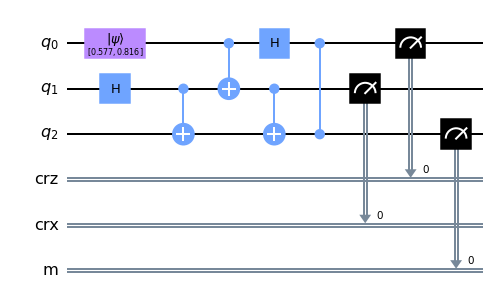

In [10]:
qc = circuito_telep([np.sqrt(1/3),np.sqrt(2/3)])
qc.draw('mpl')

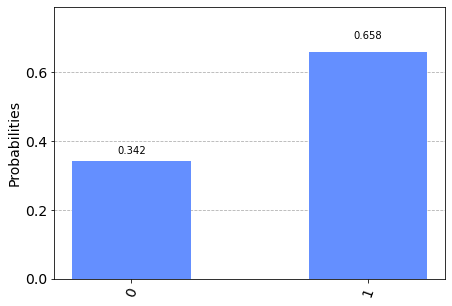

In [11]:
get_histogram(qc)